In [1]:
import os
import platform
from IPython.display import clear_output
print(platform.platform())

def resolve_dir(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)

def reset_path(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)
    else:
        os.system('rm -f {}/*'.format( Dir))
        

Windows-10-10.0.22621-SP0


In [2]:
import tensorflow as tf

# Check the number of available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

# If GPUs are available, print information about each GPU
if gpus:
    for gpu in gpus:
        print("GPU name:", gpu.name)
        print("GPU type:", gpu.device_type)


Num GPUs Available: 1
GPU name: /physical_device:GPU:0
GPU type: GPU


In [17]:

gpus = tf.config.list_physical_devices("GPU")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)



Num GPUs Available:  1
Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [10]:
import tensorflow as tf

# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
!pip show numpy
!pip show tensorflow
!pip install numpy==1.22.3

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD-3-Clause
Location: c:\users\anike\anaconda3\lib\site-packages
Requires: 
Required-by: wordcloud, ultralytics, torchvision, tifffile, thinc, tensorflow, tensorflow-intel, tensorboard, tables, statsmodels, spacy, seaborn, scipy, scikit-learn, scikit-image, PyWavelets, pyerfa, patsy, pandas, opt-einsum, opencv-python, numexpr, numba, mkl-random, mkl-fft, matplotlib, Keras-Preprocessing, imageio, imagecodecs, h5py, factor-analyzer, Bottleneck, bokeh, blis, bkcharts, astropy
Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\anike\anaconda3\lib\site-packages
Requires: flatbuffers, setuptools, google-pasta, opt-eins

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anike\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [3]:
import tensorflow as tf
tf.random.set_seed(73)
TPU_INIT = False

if TPU_INIT:
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
        tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
    except ValueError:
        raise BaseException('ERROR: Not connected to a TPU runtime!')
else:
    !nvidia-smi
;    
print("Tensorflow version " + tf.__version__)

Thu Feb 15 16:13:55 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.30       Driver Version: 462.30       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8     3W /  N/A |    190MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install --upgrade numpy


^C


In [5]:
import tensorflow as tf

# Check if TensorFlow is built with CUDA support
print("CUDA version:", tf.test.is_built_with_cuda())

# Check if TensorFlow is built with cuDNN support
print("cuDNN version:", tf.test.gpu_device_name())


CUDA version: True
cuDNN version: /device:GPU:0


In [8]:
MyDrive = '/kaggle/working'
PROJECT_DIR = r'D:\users\aniket\download\archive'

## **Preprocessing**
+ **Getting frames form video**
+ **some image argumentations**

In [20]:
!pip install imageio

In [21]:
!pip install imgaug

In [9]:
import cv2
import os
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

IMG_SIZE = 128
ColorChannels = 3

def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)
    
    import math
    rate = math.floor(vidcap.get(3))
    count = 0
    
    ImageFrames = []
    while vidcap.isOpened():
        ID = vidcap.get(1)
        success, image = vidcap.read()
        
        if success:
            # skipping frames to avoid duplications 
            if (ID % 7 == 0):
                flip = iaa.Fliplr(1.0)
                zoom = iaa.Affine(scale=1.3)
                random_brightness = iaa.Multiply((1, 1.3))
                rotate = iaa.Affine(rotate=(-25, 25))
                
                image_aug = flip(image = image)
                image_aug = random_brightness(image = image_aug)
                image_aug = zoom(image = image_aug)
                image_aug = rotate(image = image_aug)
                
                rgb_img = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(rgb_img, (IMG_SIZE, IMG_SIZE))
                ImageFrames.append(resized)
                
            count += 1
        else:
            break
    
    vidcap.release()
    
    return ImageFrames

In [10]:
%%time
from tqdm import tqdm

VideoDataDir = PROJECT_DIR + '/Real Life Violence Dataset'
print('we have \n{} Violence videos \n{} NonViolence videos'.format(
              len(os.listdir(VideoDataDir + '/Violence')), 
              len(os.listdir(VideoDataDir + '/NonViolence'))))

X_original = []
y_original = []

print('i choose 700 videos out of 2000, cuz of memory issue')
CLASSES = ["NonViolence", "Violence"]
#700 <- 350 + 350

for category in os.listdir(VideoDataDir):
    path = os.path.join(VideoDataDir, category)
    class_num = CLASSES.index(category)
    for i, video in enumerate(tqdm(os.listdir(path)[0:350])):
        frames = video_to_frames(path + '/' + video)
        for j, frame in enumerate(frames):
            X_original.append(frame)
            y_original.append(class_num)

we have 
200 Violence videos 
200 NonViolence videos
i choose 700 videos out of 2000, cuz of memory issue


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:06<00:00,  3.02it/s]

Wall time: 1min 53s


In [11]:
import numpy as np
X_original = np.array(X_original).reshape(-1 , IMG_SIZE * IMG_SIZE * 3)
y_original = np.array(y_original)
len(X_original)

7950

In [25]:
!pip install scikit-learn

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_sample = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=73)

for train_index, test_index in stratified_sample.split(X_original, y_original):
    X_train, X_test = X_original[train_index], X_original[test_index]
    y_train, y_test = y_original[train_index], y_original[test_index]

X_train_nn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
X_test_nn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=73, stratify=y_original)

# Preprocess data in batches
batch_size = 32
num_batches = len(X_train) // batch_size

X_train_nn = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    X_batch = X_train[start_idx:end_idx].reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
    X_train_nn.append(X_batch)

# Handle the remaining data (if the total number of samples is not divisible by batch_size)
if len(X_train) % batch_size != 0:
    X_batch = X_train[num_batches * batch_size:].reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
    X_train_nn.append(X_batch)

X_train_nn = np.concatenate(X_train_nn, axis=0)

# Preprocess test data
X_test_nn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255


## **Model Training**

In [13]:
!pip install imutils
clear_output()


  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=e4d3682e3e0e273c29e2fc2f7bf9c3b71cab6992f8cfd42c84f65f746658b68b
  Stored in directory: c:\users\anike\appdata\local\pip\cache\wheels\35\e4\69\cb99d996d14a2971b79b990d68b05a17d58ce530ff96090dfc
Successfully built imutils


In [14]:
import cv2
import os
import numpy as np
import pickle
import matplotlib
matplotlib.use("Agg")

from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dropout,Flatten,Dense

import matplotlib.pyplot as plt

In [15]:
epochs = 30

from keras import regularizers
kernel_regularizer = regularizers.l2(0.0001)

from keras.applications.mobilenet_v2 import MobileNetV2

def load_layers():
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    baseModel = MobileNetV2(pooling='avg',
                            include_top=False, 
                            input_tensor=input_tensor)
    
    headModel = baseModel.output   
    headModel = Dense(1, activation="sigmoid")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    print("Compiling model...")
    model.compile(loss="binary_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])

    return model

if TPU_INIT:
    with tpu_strategy.scope():
        model = load_layers()
else:
    model = load_layers()

model.summary()

Compiling model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1

                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 16, 16, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
          

                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 8, 8, 384)   1536        ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malizatio

 block_10_project (Conv2D)      (None, 8, 8, 96)     36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_

 block_14_depthwise_BN (BatchNo  (None, 4, 4, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_

In [16]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

patience = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005

batch_size = 4

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True

In [17]:
end_callback = myCallback()

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

early_stopping = EarlyStopping(patience = patience, monitor='val_loss',
                                 mode='min', restore_best_weights=True, 
                                 verbose = 1, min_delta = .00075)

PROJECT_DIR = MyDrive + '/RiskDetection'

lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

os.system('rm -rf ./logs/')

import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, write_graph=True, histogram_freq=1)

checkpoint_filepath = 'ModelWeights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)


callbacks = [end_callback, lr_callback, model_checkpoints, tensorboard_callback, early_stopping, lr_plat]

if TPU_INIT:
    callbacks = [end_callback, lr_callback, model_checkpoints, early_stopping, lr_plat]

In [18]:
print('Training head...')
#model.load_weights('./Model_Weights.h5')

history = model.fit(X_train_nn ,y_train, epochs=epochs,
                        callbacks=callbacks,
                        validation_data = (X_test_nn, y_test),
                        batch_size=batch_size)

print('\nRestoring best Weights for MobileNetV2')
model.load_weights(checkpoint_filepath)

Training head...
Epoch 1/30
1392/1392 [==============================] - ETA: 0s - loss: 0.9677 - accuracy: 0.4293
Epoch 1: val_loss improved from inf to 0.81190, saving model to ModelWeights.h5
1392/1392 [==============================] - 109s 35ms/step - loss: 0.9677 - accuracy: 0.4293 - val_loss: 0.8119 - val_accuracy: 0.5124 - lr: 1.0000e-05
Epoch 2/30
1392/1392 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.6307
Epoch 2: val_loss improved from 0.81190 to 0.52681, saving model to ModelWeights.h5
1392/1392 [==============================] - 23s 16ms/step - loss: 0.6551 - accuracy: 0.6307 - val_loss: 0.5268 - val_accuracy: 0.7308 - lr: 1.8000e-05
Epoch 3/30
1388/1392 [============================>.] - ETA: 0s - loss: 0.4328 - accuracy: 0.8026
Epoch 3: val_loss improved from 0.52681 to 0.35971, saving model to ModelWeights.h5
1392/1392 [==============================] - 21s 15ms/step - loss: 0.4333 - accuracy: 0.8023 - val_loss: 0.3597 - val_accuracy: 0.8566 -

1392/1392 [==============================] - 42s 30ms/step - loss: 0.1020 - accuracy: 0.9671 - val_loss: 0.1143 - val_accuracy: 0.9610 - lr: 1.0576e-05
Epoch 26/30
1390/1392 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9671
Epoch 26: val_loss improved from 0.11426 to 0.11304, saving model to ModelWeights.h5
1392/1392 [==============================] - 26s 19ms/step - loss: 0.1010 - accuracy: 0.9669 - val_loss: 0.1130 - val_accuracy: 0.9614 - lr: 1.0461e-05
Epoch 27/30
1389/1392 [============================>.] - ETA: 0s - loss: 0.0993 - accuracy: 0.9690
Epoch 27: val_loss improved from 0.11304 to 0.11228, saving model to ModelWeights.h5
1392/1392 [==============================] - 24s 17ms/step - loss: 0.0999 - accuracy: 0.9687 - val_loss: 0.1123 - val_accuracy: 0.9623 - lr: 1.0369e-05
Epoch 28/30
1392/1392 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9686
Epoch 28: val_loss improved from 0.11228 to 0.11152, saving model to ModelWei

In [33]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if not gpus:
    print("No GPU available. Make sure TensorFlow can detect your GPU.")
else:
    # Explicitly set memory growth to avoid GPU memory allocation issues
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("Found the following GPU(s):")
    for gpu in gpus:
        print("Name:", gpu.name)

# Perform a simple operation on GPU
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
c = tf.matmul(a, b)

# Print the result
print("Result of matrix multiplication on GPU:")
print(c)


Found the following GPU(s):
Name: /physical_device:GPU:0
Result of matrix multiplication on GPU:
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
%matplotlib inline

def print_graph(item, index, history):
    plt.figure()
    train_values = history.history[item][0:index]
    plt.plot(train_values)
    test_values = history.history['val_' + item][0:index]
    plt.plot(test_values)
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()
    plot = '{}.png'.format(item)
    plt.savefig(plot)


def get_best_epoch(test_loss, history):
    for key, item in enumerate(history.history.items()):
        (name, arr) = item
        if name == 'val_loss':
            for i in range(len(arr)):
                if round(test_loss, 2) == round(arr[i], 2):
                    return i
                
def model_summary(model, history):
    print('---'*30)
    test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)

    if history:
        index = get_best_epoch(test_loss, history)
        print('Best Epochs: ', index)

        train_accuracy = history.history['accuracy'][index]
        train_loss = history.history['loss'][index]

        print('Accuracy on train:',train_accuracy,'\tLoss on train:',train_loss)
        print('Accuracy on test:',test_accuracy,'\tLoss on test:',test_loss)
        print_graph('loss', index, history)
        print_graph('accuracy', index, history)
        print('---'*30)                

------------------------------------------------------------------------------------------
Best Epochs:  23
Accuracy on train: 0.9665768146514893 	Loss on train: 0.10320334136486053
Accuracy on test: 0.9618448615074158 	Loss on test: 0.11009632796049118


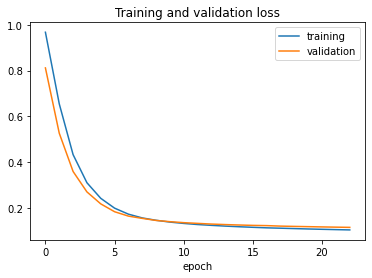

<Figure size 432x288 with 0 Axes>

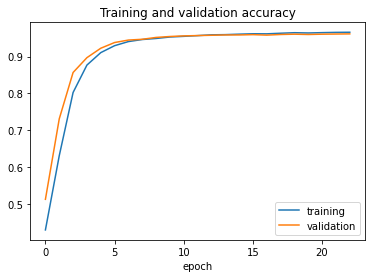

------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [20]:
model_summary(model, history)

## **Evaluation on test set**

In [21]:
# evaluate the network
print("Evaluating network...")
predictions = model.predict(X_test_nn)
preds = predictions > 0.5

Evaluating network...
75/75 [==============================] - 7s 25ms/step


<ipython-input-22-de97b9dafb2a>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_correct = np.int((corr_pred[0][0] + corr_pred[1][1]))
<ipython-input-22-de97b9dafb2a>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated

> Correct Predictions: 2294
> Wrong Predictions: 91


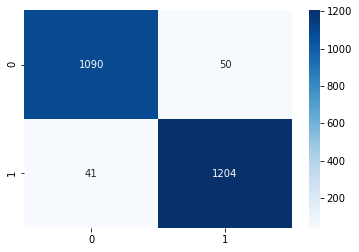

              precision    recall  f1-score   support

 NonViolence       0.96      0.96      0.96      1140
    Violence       0.96      0.97      0.96      1245

    accuracy                           0.96      2385
   macro avg       0.96      0.96      0.96      2385
weighted avg       0.96      0.96      0.96      2385



In [22]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, accuracy_score, classification_report, confusion_matrix
corr_pred = metrics.confusion_matrix(y_test, preds)

n_correct = np.int((corr_pred[0][0] + corr_pred[1][1]))
print('> Correct Predictions:', n_correct)
n_wrongs = np.int((corr_pred[0][1] + (corr_pred[1][0])))
print('> Wrong Predictions:', n_wrongs)

sns.heatmap(corr_pred,annot=True, fmt="d",cmap="Blues")
plt.show()

print(metrics.classification_report(y_test, preds, 
                           target_names=["NonViolence", "Violence"]))

In [23]:
args_model = "modelnew.h5"
model.save(args_model)